<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m3_%EB%B6%84%EC%84%9D%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/visualized_2_0618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/tasneemabdulrahim/tips-dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [8]:
# pivot table
pd.pivot_table(tips, index='day',
               columns='size',
               values='total_bill',
               aggfunc='count', fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [14]:
# 빈도표
party_counts = pd.crosstab(tips['day'],tips['size'])
# party_counts = pd.crosstab(tips['size'],tips['day'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [10]:
# 테이블 사이즈가 2~5개까지인 것만 사용
pc_25 = party_counts.loc[:, 2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [15]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [16]:
# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x : x/pc_25.sum(1))
# pc_25.div(pc_25.sum(1), axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

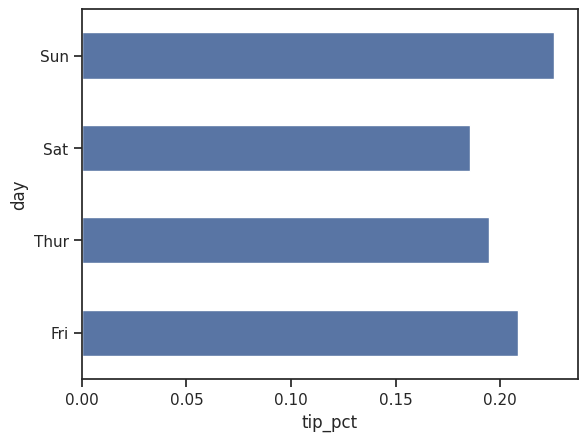

In [51]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])    # tip 비중
print(tips.head())
# sns.set_style("darkgrid")
# sns.set_style("whitegrid")
# sns.set_style("dark")
# sns.set_style("white")
# sns.set_style("ticks")    # 기본
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar=None, width=0.5) # errorbar는 오차 막대를 제어

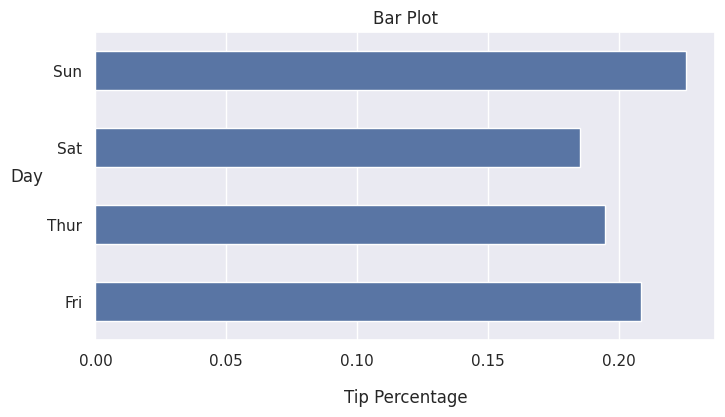

In [59]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
plt.figure(figsize=(8,4))
sns.set(color_codes=True)
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar=None, width=0.5)
plt.title("Bar Plot")
# labelpad는 라벨의 간격
plt.xlabel("Tip Percentage",labelpad=15,fontsize=12)
plt.ylabel("Day",labelpad=15,fontsize=12,rotation=0)
plt.show()

In [ ]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
# print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', errorbar=None, width=0.7) # errorbar는 오차 막대를 제어
plt.title('Barh Graph', pad=30, fontsize=15)
plt.xlabel('Tip_pct',labelpad=15,fontsize=12)
plt.ylabel('Day',labelpad=15,fontsize=12)
plt.show()

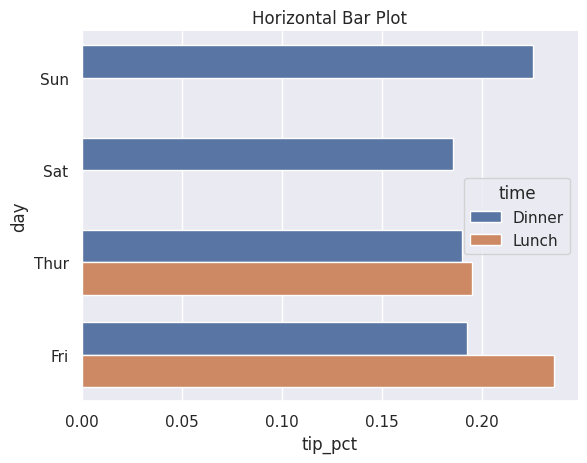

In [56]:
sns.set(color_codes=True)
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', errorbar=None, width=0.7)
sns.despine(left=True)
plt.title("Horizontal Bar Plot")
plt.show()

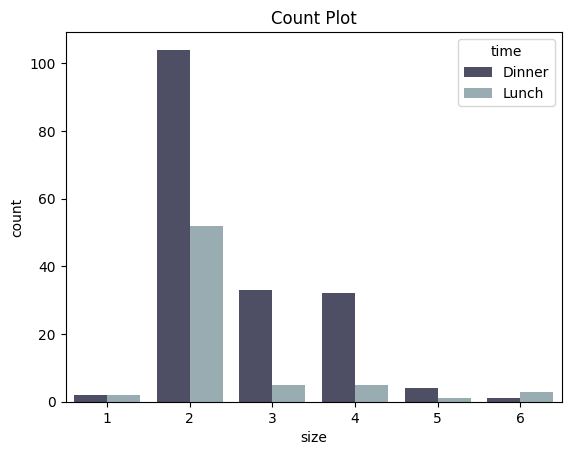

In [24]:
sns.countplot(x='size', data=tips, hue='time', palette='bone')
plt.title("Count Plot")
plt.show()

In [25]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

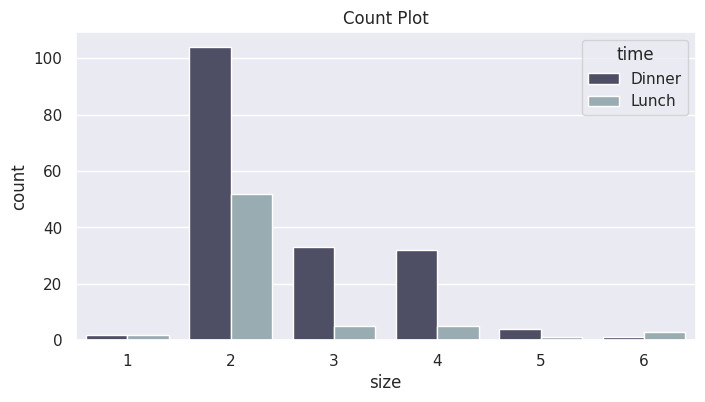

In [39]:
# countplot
plt.figure(figsize=(8,4))
# sns.set_style("whitegrid")
sns.set(color_codes=True)
sns.countplot(x='size', data=tips, hue='time', palette='bone')
plt.title("Count Plot")
plt.show()

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

In [62]:
import numpy as np
import seaborn as sns

In [93]:
# 정규분포 난수 샘플
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.describe()

count    400.000000
mean       4.932450
std        5.166718
min       -2.184394
25%       -0.038315
50%        3.673522
75%        9.736713
max       15.126673
dtype: float64

<Axes: ylabel='Count'>

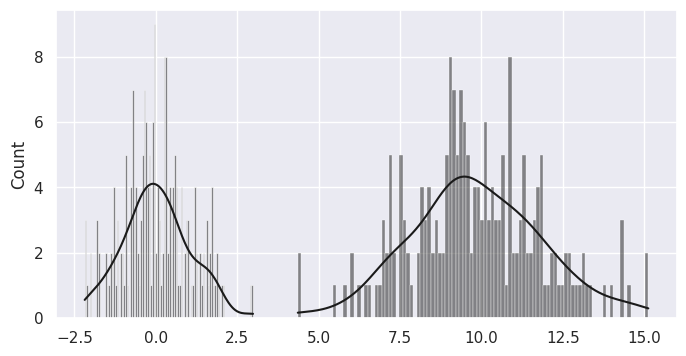

In [96]:
plt.figure(figsize=(8,4))
sns.histplot(comp1,bins=100,color='k',kde=True)
sns.histplot(comp2,bins=100,color='k',kde=True)

In [69]:
uploaded = files.upload()

Saving fm2.csv to fm2.csv


In [74]:
fish_multi = pd.read_csv('fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<Axes: xlabel='length', ylabel='Count'>

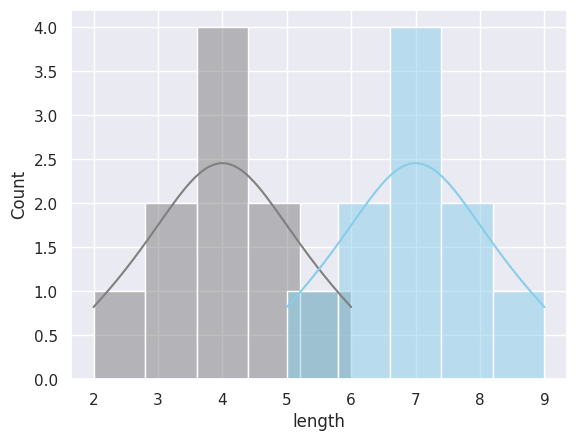

In [81]:
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species == "B"')['length']
sns.histplot(length_a,bins=5,color='gray',kde=True)
sns.histplot(length_b,bins=5,color='skyblue',kde=True)

<Axes: xlabel='species', ylabel='length'>

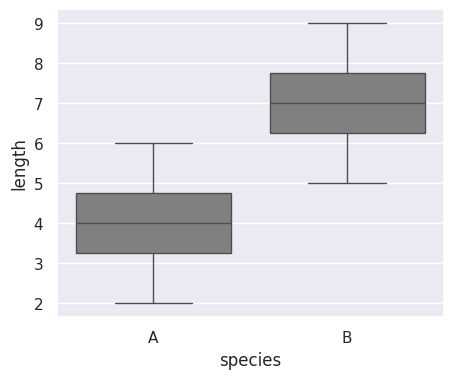

In [84]:
# Q. box plot으로 A,B 비교
plt.figure(figsize=(5,4))
sns.boxplot(x='species',y='length',data=fish_multi,color='gray')

<Axes: xlabel='species', ylabel='length'>

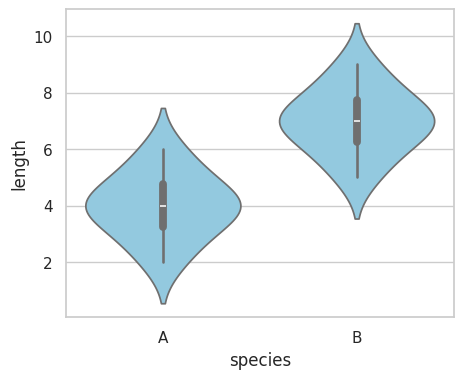

In [92]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져 있는 분산의 정도 파악
plt.figure(figsize=(5,4))
sns.set_style("whitegrid")
sns.violinplot(x='species',y='length',data=fish_multi,color='skyblue')

In [97]:
uploaded = files.upload()

Saving cov.csv to cov.csv


In [98]:
cov_data = pd.read_csv('cov.csv')
cov_data.head()

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45


Text(7.000000000000002, 0.5, 'y')

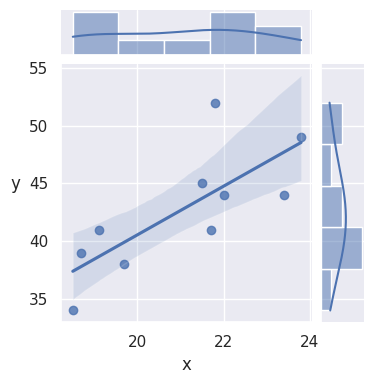

In [110]:
sns.jointplot(x='x',y='y',data=cov_data,kind='reg',height=4)
plt.ylabel('y',labelpad=10,rotation=0)

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.

In [116]:
np.random.seed(10)
data = pd.DataFrame({
    'x' : np.random.rand(50),
    'y' : np.random.rand(50),
    'category' : np.random.choice(['A','B'],50)
})

Text(52.90545138888889, 0.5, 'y')

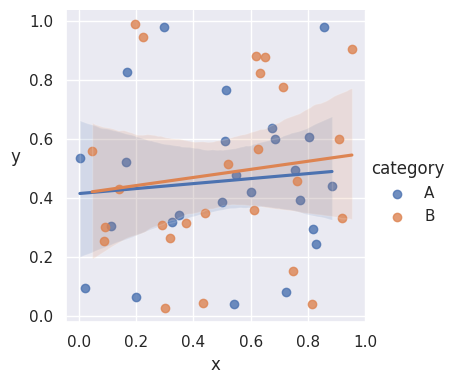

In [117]:
# lmplot 예
sns.lmplot(x='x',y='y',data=data,hue='category',height=4)
plt.title('sns.lmplot Example')
plt.ylabel('y',labelpad=10,rotation=0)

Text(0, 0.5, 'y')

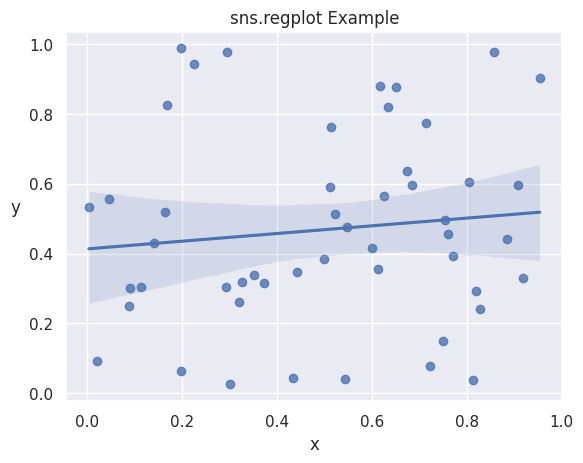

In [121]:
# regplot 예
sns.regplot(x='x',y='y',data=data)
plt.title('sns.regplot Example')
plt.ylabel('y',labelpad=10,rotation=0)

In [123]:
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg (1).csv


In [125]:
df_auto = pd.read_csv('auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: ylabel='mpg'>

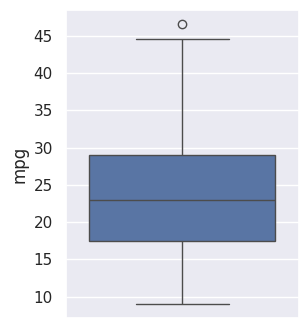

In [135]:
plt.figure(figsize=(3,4))
sns.boxplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

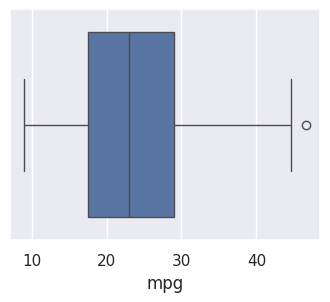

In [131]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_auto,x='mpg')

<Axes: ylabel='mpg'>

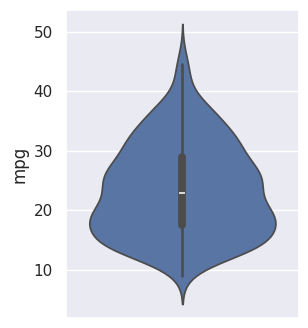

In [136]:
plt.figure(figsize=(3,4))
sns.violinplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

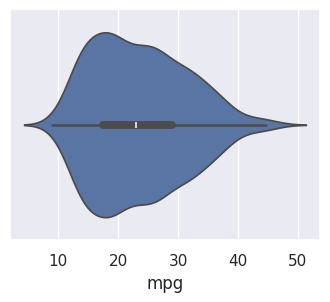

In [133]:
plt.figure(figsize=(4,3))
sns.violinplot(data=df_auto,x='mpg')

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

<Axes: xlabel='model year', ylabel='mpg'>

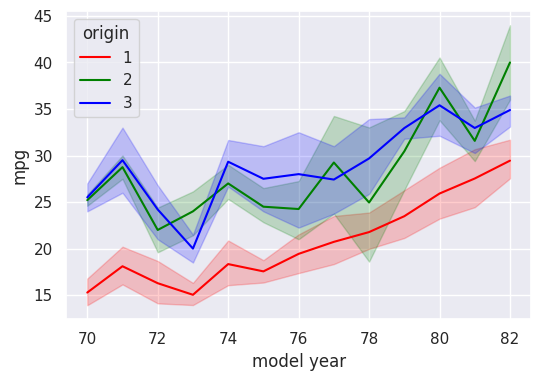

In [140]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_auto, x='model year', y='mpg', hue='origin', err_style='band', palette=['red','green','blue'])

<Axes: xlabel='model year', ylabel='mpg'>

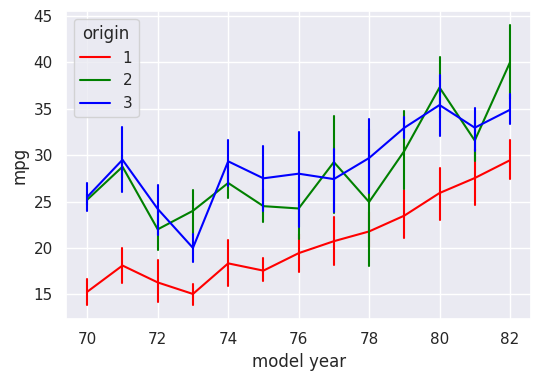

In [141]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_auto, x='model year', y='mpg', hue='origin', err_style='bars', palette=['red','green','blue'])

Text(820.7777777777778, 0.5, 'mpg')

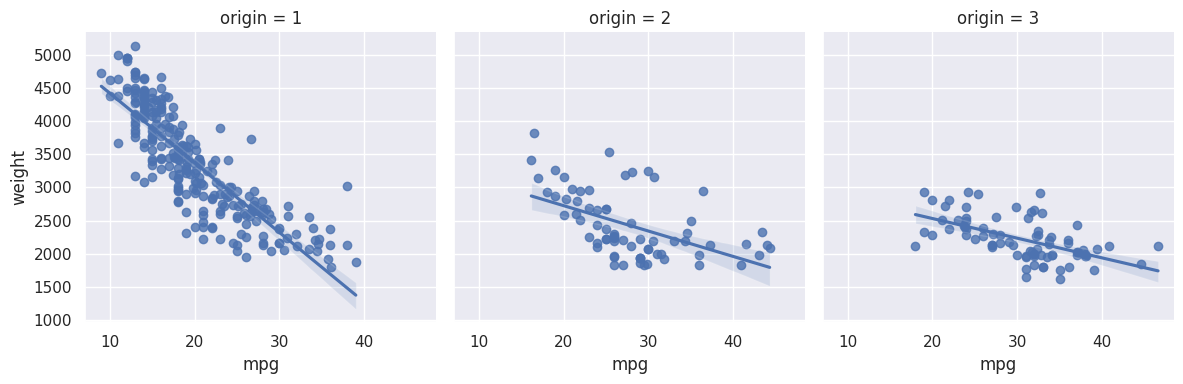

In [144]:
# 첫번째 열: 전체 데이터에 대한 그래프
# col_wrap=3은 한 행에 최대 3개의 그래프를 그리도록 설정
sns.lmplot(x='mpg',y='weight',data=df_auto, col='origin', col_wrap=3, height=4)
plt.ylabel('mpg',labelpad=10,rotation=0)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

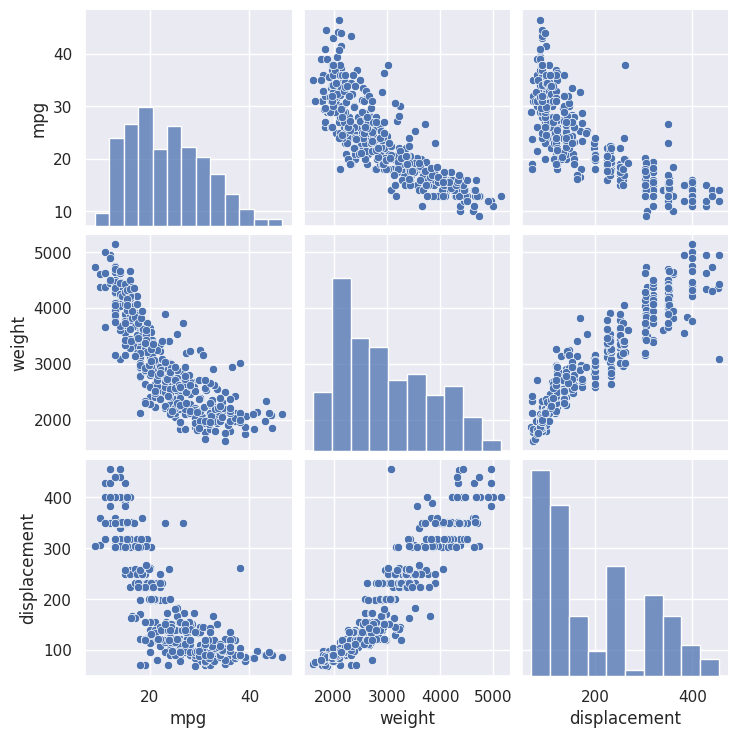

In [145]:
sns.pairplot(df_auto[['mpg','weight','displacement']], palette='rainbow')

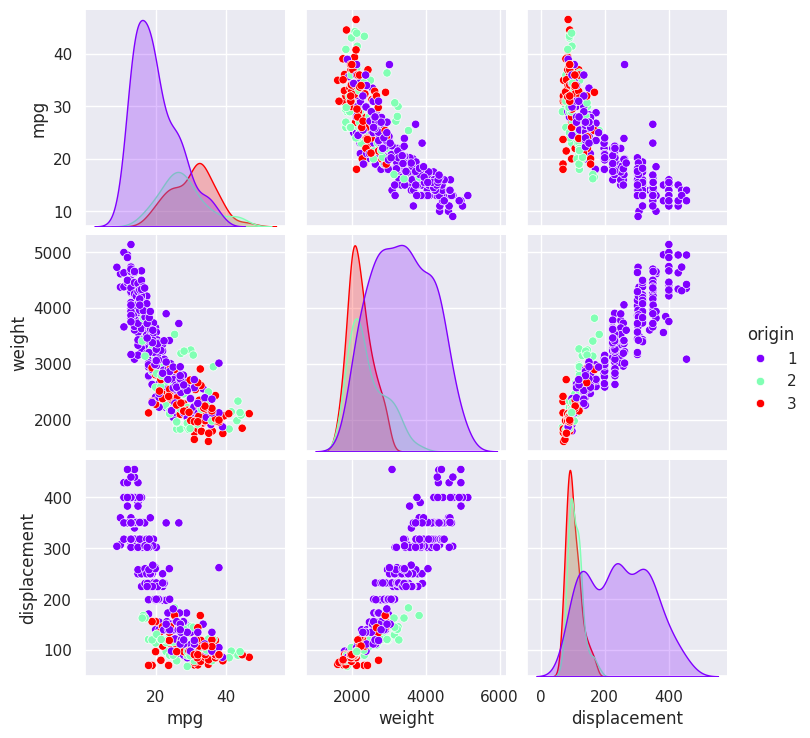

In [147]:
sns.pairplot(df_auto[['mpg','weight','displacement','origin']], palette='rainbow', hue='origin', diag_kind='kde')

In [150]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [151]:
t_df[['pclass','age','fare','survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


Text(0.5, 1.0, 'Heatmap of th Dataset')

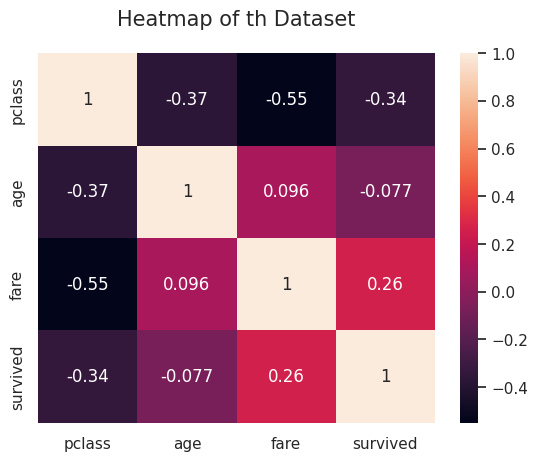

In [152]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot=True)
plt.title('Heatmap of th Dataset',pad=20,fontsize=15)